# 1d Boolean Cellular Automata

Let $a_i^0$ be a boolean array -- initial conditions. 

Then values on the next ($a_i^1$) and all further time steps ($a_i^t$) are defined only be neighboring values on previous time step

$$a_i^t = f(a_{i-1}^{t-1}, a_{i}^{t-1}, a_{i+1}^{t-1}) $$

Such system we will call 1-d Cellular Automata.
There are $2^8$ possible rules, which we will code as a numbers from 0 to $2^8-1$  


## Simulation engine (a)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def number_to_rules(number):
    inversed = []
    for i in range(8):
        inversed.append(number % 2)
        number = number // 2
    return list(reversed(inversed))
def case_to_index(a, b, c):
    return 7 - (a*4 + b*2 + c)
print(number_to_rules(150))

[1, 0, 0, 1, 0, 1, 1, 0]


In [21]:
def simulate(rules, n_steps, initial_field, periodic=False, stop_condition=None):
    steps = [np.array(initial_field, dtype=bool)]
    def f(a, b, c):
        return rules[case_to_index(a, b, c)]
    for i in range(n_steps):
        prev = steps[-1]
        if stop_condition is not None and stop_condition(prev):
            break
        next = np.zeros_like(prev, dtype=bool)
        # corner case
        if periodic:
            args = [prev[-1], prev[0], prev[1]]
            next[0] = f(*args)
            args = [prev[-2], prev[-1], prev[0]]
            next[-1] = f(*args)
        else:
            args = [0, prev[0], prev[1]]
            next[0] = f(*args)
            args = [prev[-2], prev[-1], 0]
            next[-1] = f(*args)
        for i in range(1, len(prev) - 1):
            args = [prev[i - 1], prev[i], prev[i + 1]]
            next[i] = f(*args)
        steps.append(next)
    return steps

#### tests


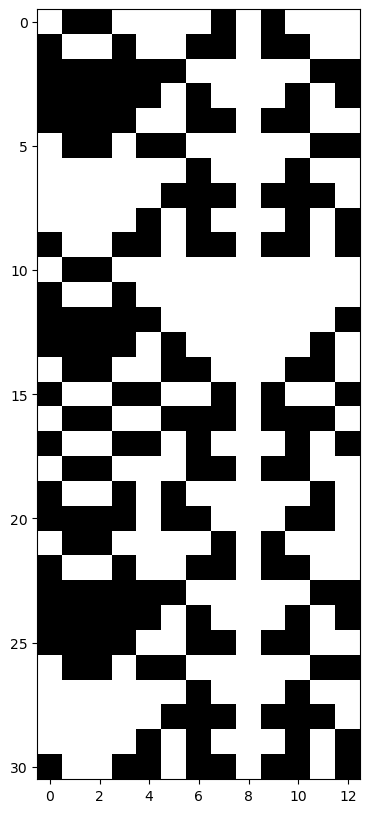

In [27]:
rules = [int(x) for x in "10010110"]    # 150 rule
field = [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]
steps = simulate(rules, 30, field, periodic=True)

grid = np.array(steps)
plt.figure(figsize=(10, 10))
plt.imshow(grid, cmap="Greys")

"moving to the left" rule test

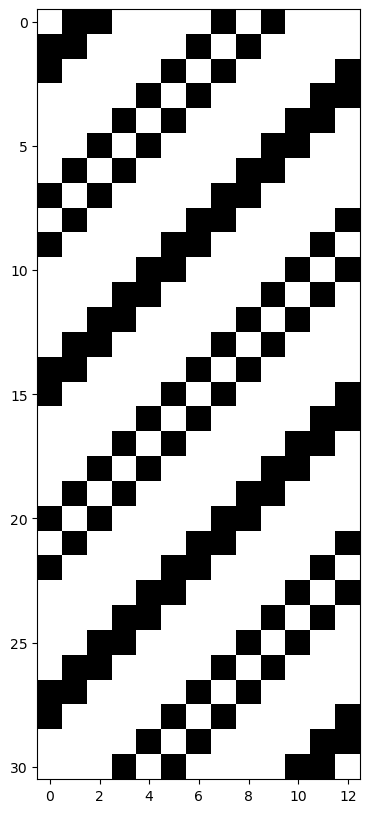

In [106]:
rules = [int(x) for x in "10101010"]
field = [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]
steps = simulate(rules, 30, field, periodic=True)

grid = np.array(steps)
plt.figure(figsize=(10, 10))
plt.imshow(grid, cmap="Greys")

moving to the right rule

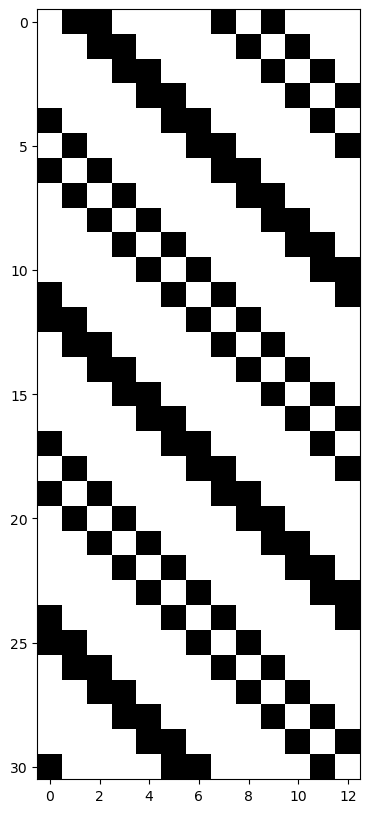

In [107]:
rules = [int(x) for x in "11110000"]
field = [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]
steps = simulate(rules, 30, field, periodic=True)

grid = np.array(steps)
plt.figure(figsize=(10, 10))
plt.imshow(grid, cmap="Greys")

works as expected.

## 150 rule (b)

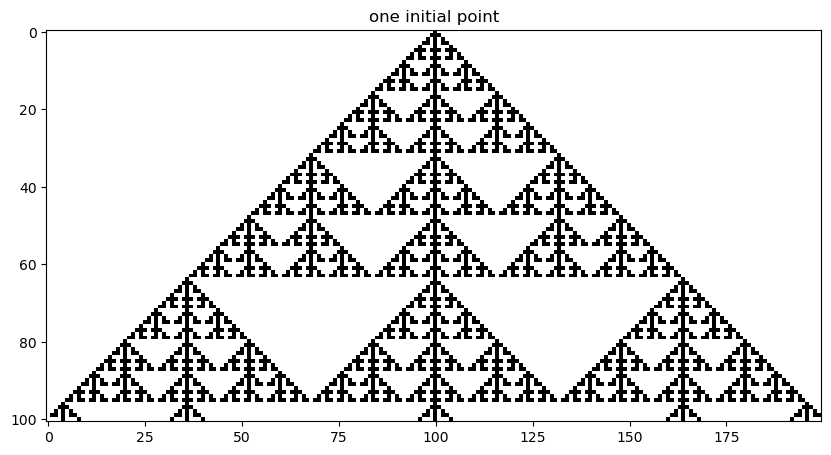

In [32]:
field = np.zeros(200)
field[100] = 1
steps = simulate(rules, 100, field, periodic=True)

grid = np.array(steps)
plt.figure(figsize=(10, 10))
plt.title("one initial point")
plt.imshow(grid, cmap="Greys")

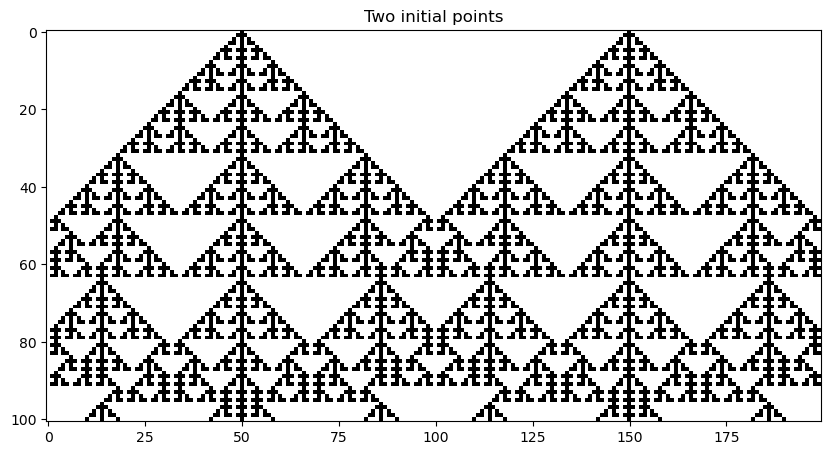

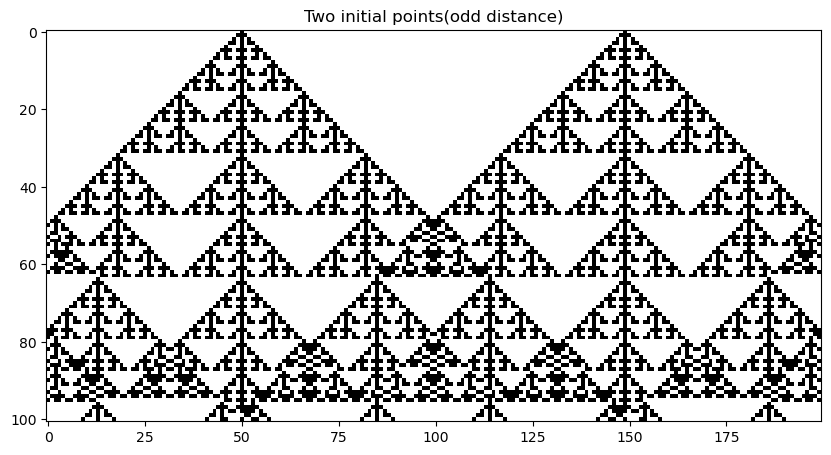

In [35]:
field = np.zeros(200)
field[50] = 1
field[150] = 1
steps = simulate(rules, 100, field, periodic=True)

grid = np.array(steps)
plt.figure(figsize=(10, 10))
plt.title("Two initial points")
plt.imshow(grid, cmap="Greys")
plt.show()

field = np.zeros(200)
field[50] = 1
field[149] = 1
steps = simulate(rules, 100, field, periodic=True)

grid = np.array(steps)
plt.figure(figsize=(10, 10))
plt.title("Two initial points(odd distance)")
plt.imshow(grid, cmap="Greys")
plt.show()

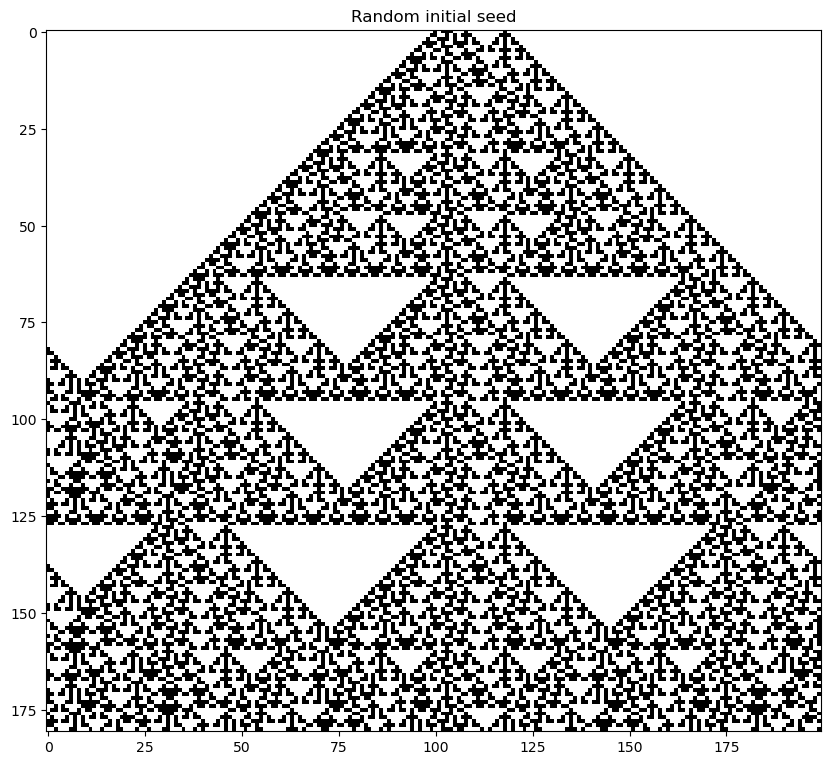

In [41]:
field = np.zeros(200)
field[100] = 1
field[102] = 1
field[103] = 1
field[104] = 1
field[108] = 1
field[118] = 1
steps = simulate(rules, 180, field, periodic=True)

grid = np.array(steps)
plt.figure(figsize=(10, 10))
plt.title("Random initial seed")
plt.imshow(grid, cmap="Greys")
plt.show()

Non-periodic boundary conditions.

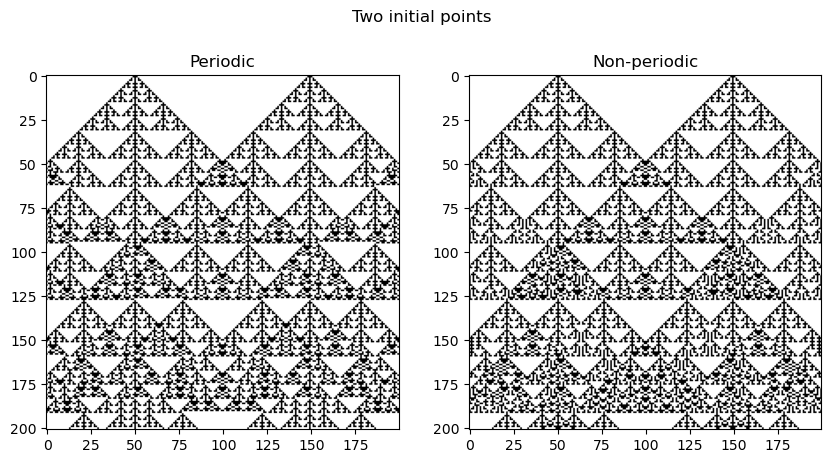

In [47]:
plt.figure(figsize=(10, 5))
plt.suptitle("Two initial points")
plt.subplot(1, 2, 1)

field = np.zeros(200)
field[50] = 1
field[-51] = 1
steps = simulate(rules, 200, field, periodic=True)

grid = np.array(steps)
plt.imshow(grid, cmap="Greys")
plt.title("Periodic")

plt.subplot(1, 2, 2)

field = np.zeros(200)
field[50] = 1
field[-51] = 1
steps = simulate(rules, 200, field, periodic=False)

grid = np.array(steps)
plt.title("Non-periodic")
plt.imshow(grid, cmap="Greys")


Observations:

One point makes this pattern similar to the sierpinski triangle. And more points result just in superposition of such patters, that are added by modulo 2. This is because the rules are linear in $\mathbb{Z}_2$ group.

## Randomized initial configurations (c)

In [48]:
def generate_field(n, p=0.5):
    field = np.random.random(n) > p
    return field

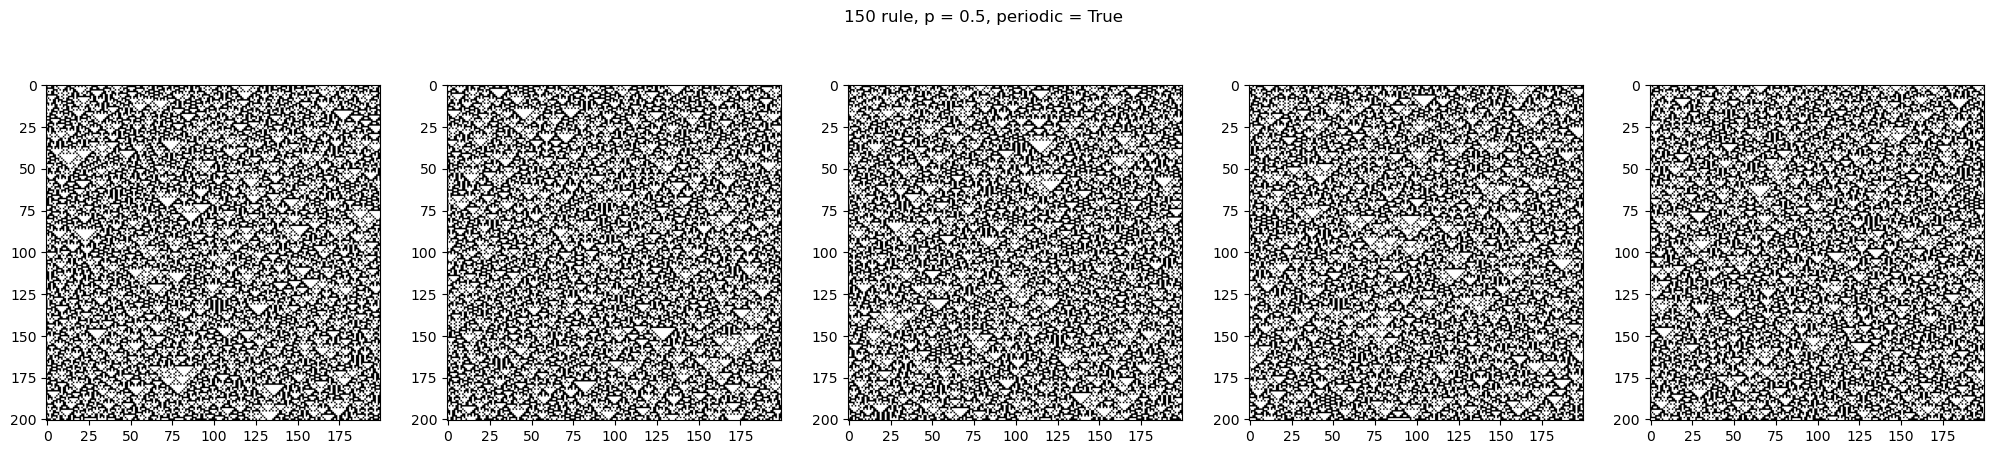

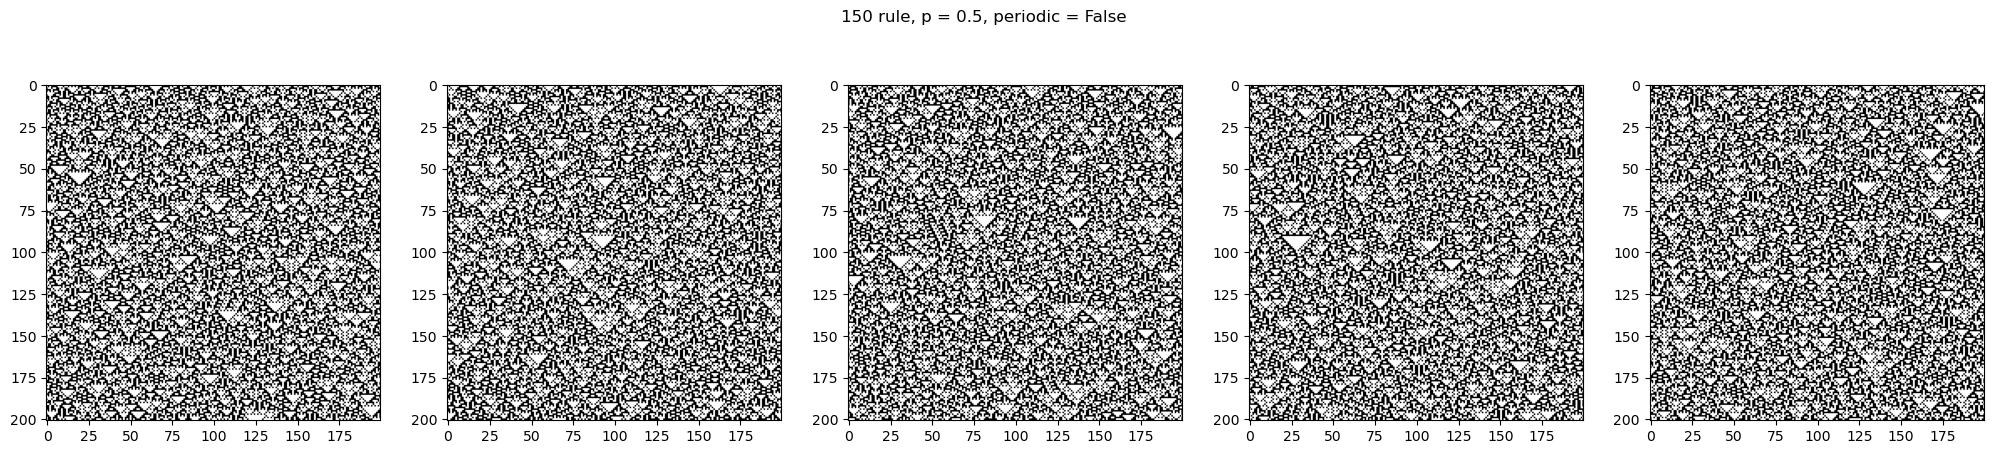

In [56]:
n_plots = 5

for periodic in [True, False]:
    plt.figure(figsize=(n_plots*5, 5))
    plt.suptitle(f"90 rule, p = 0.5, periodic = {periodic}")
    rules = number_to_rules(90)
    for i in range(n_plots):
        plt.subplot(1, n_plots, i+1)
        field = generate_field(200)
        steps = simulate(rules, 200, field, periodic=True)
        grid = np.array(steps)
        plt.imshow(grid, cmap="Greys")


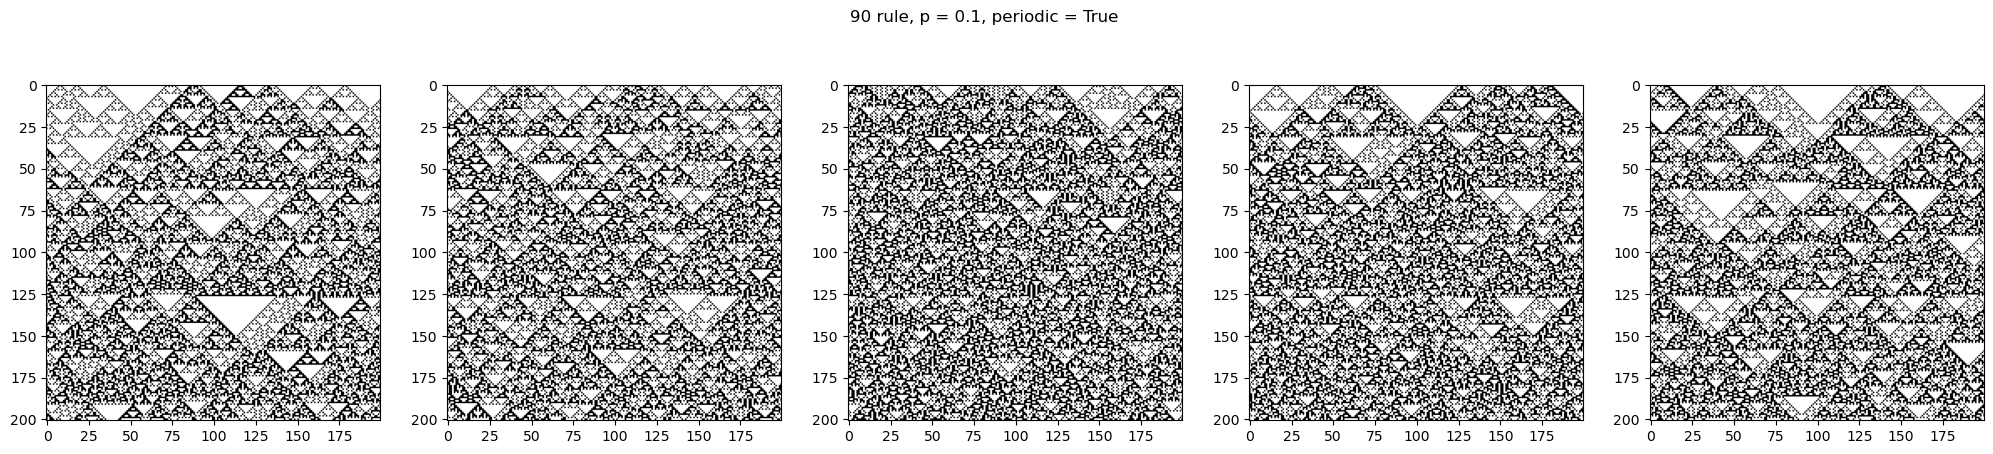

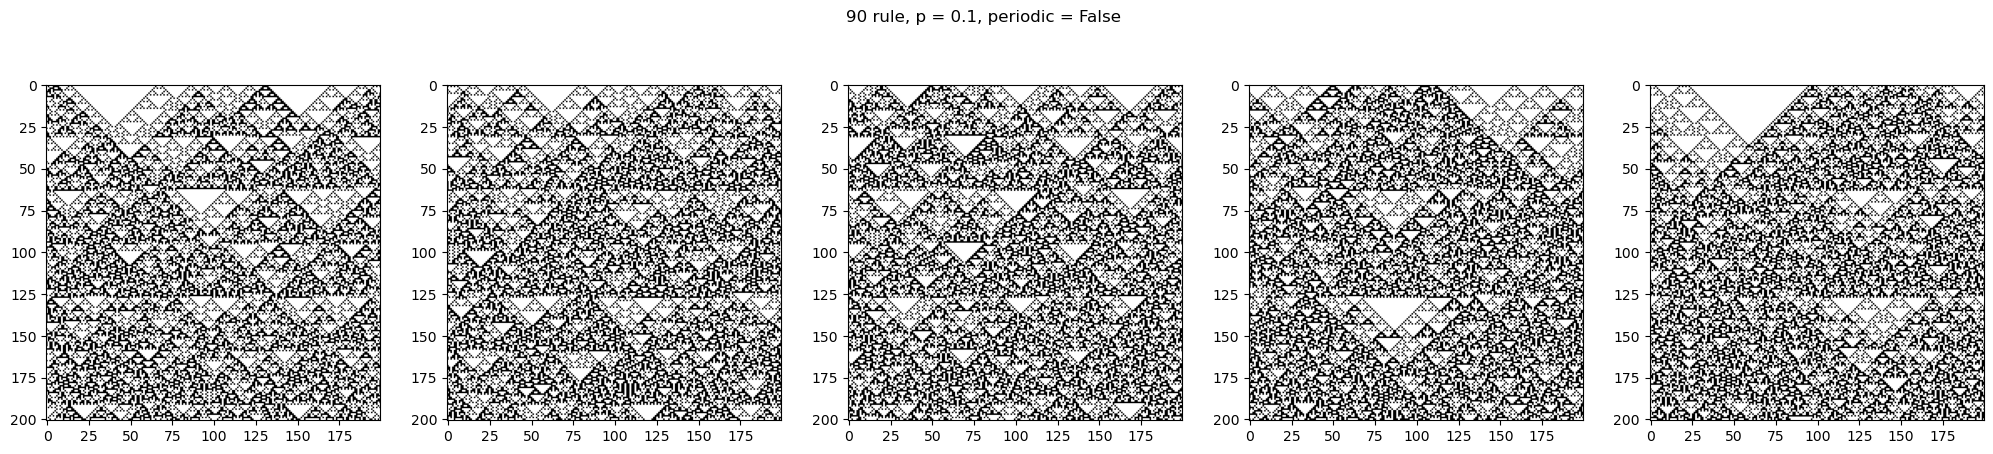

In [57]:
n_plots = 5
p = 0.1
for periodic in [True, False]:
    plt.figure(figsize=(n_plots*5, 5))
    plt.suptitle(f"90 rule, p = {p}, periodic = {periodic}")
    rules = number_to_rules(90)
    for i in range(n_plots):
        plt.subplot(1, n_plots, i+1)
        field = generate_field(200, p=p)
        steps = simulate(rules, 200, field, periodic=True)
        grid = np.array(steps)
        plt.imshow(grid, cmap="Greys")


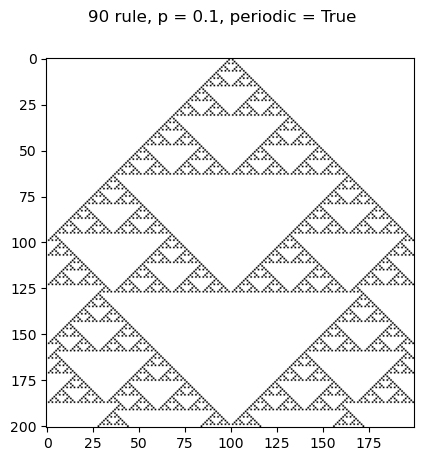

In [90]:
n_plots = 5
p = 0.1
periodic = True
plt.suptitle(f"90 rule, one point, periodic = {periodic}")
rules = number_to_rules(90)
field = np.zeros(200, dtype=bool)
field[100] = 1
steps = simulate(rules, 200, field, periodic=True)
grid = np.array(steps)
plt.imshow(grid, cmap="Greys")


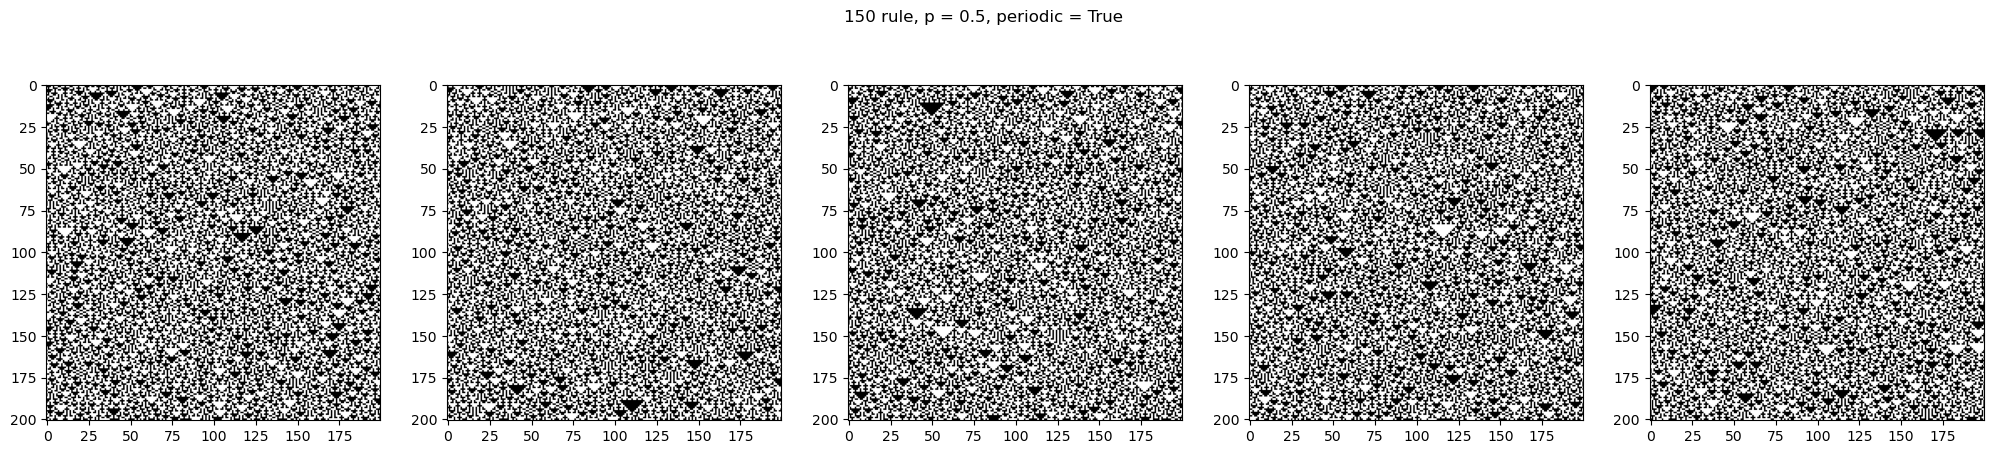

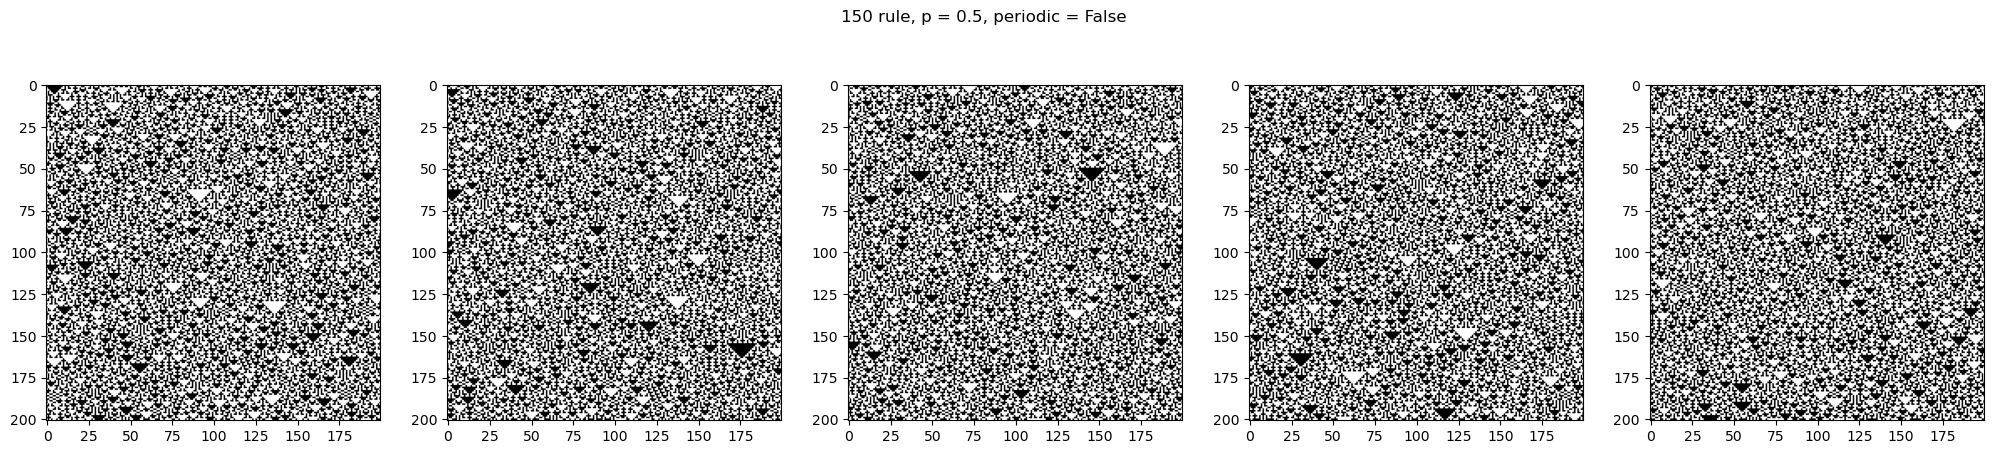

In [60]:
n_plots = 5
p = 0.5
rule = 150
for periodic in [True, False]:
    plt.figure(figsize=(n_plots*5, 5))
    plt.suptitle(f"{rule} rule, p = {p}, periodic = {periodic}")
    rules = number_to_rules(rule)
    for i in range(n_plots):
        plt.subplot(1, n_plots, i+1)
        field = generate_field(200, p=p)
        steps = simulate(rules, 200, field, periodic=True)
        grid = np.array(steps)
        plt.imshow(grid, cmap="Greys")


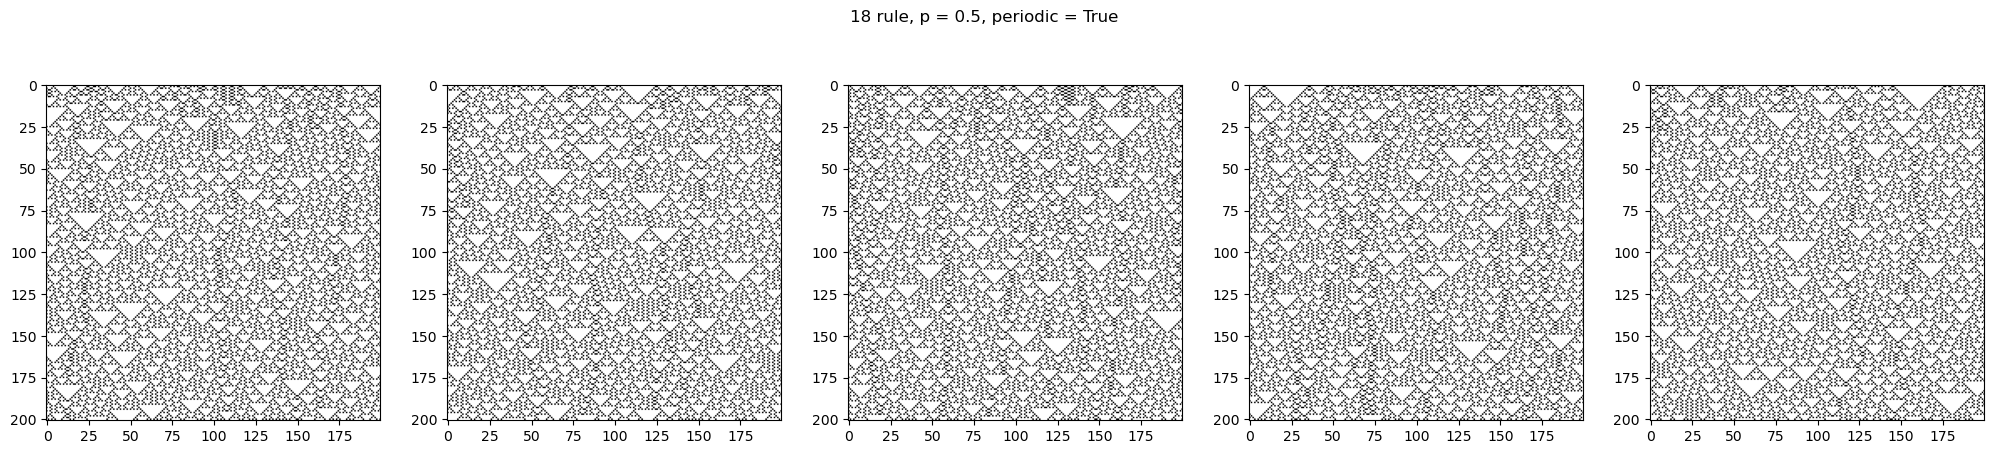

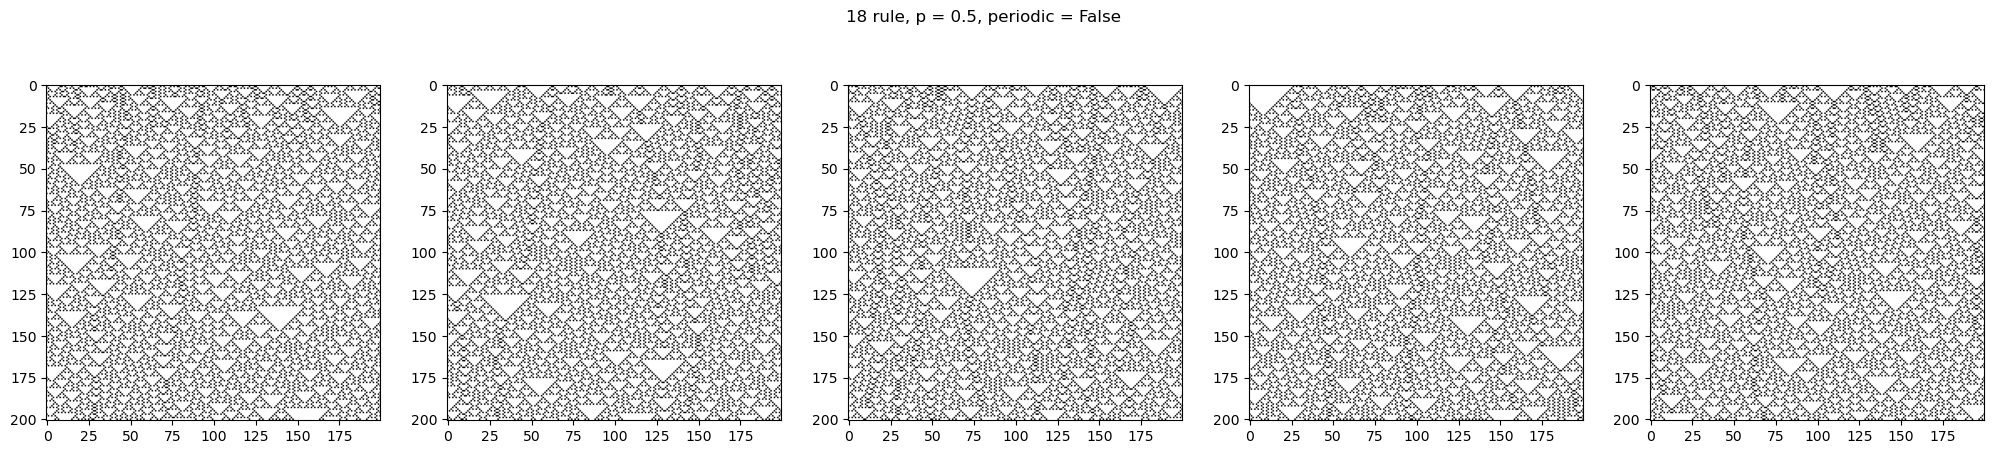

In [61]:
n_plots = 5
p = 0.5
rule = 18
for periodic in [True, False]:
    plt.figure(figsize=(n_plots*5, 5))
    plt.suptitle(f"{rule} rule, p = {p}, periodic = {periodic}")
    rules = number_to_rules(rule)
    for i in range(n_plots):
        plt.subplot(1, n_plots, i+1)
        field = generate_field(200, p=p)
        steps = simulate(rules, 200, field, periodic=True)
        grid = np.array(steps)
        plt.imshow(grid, cmap="Greys")


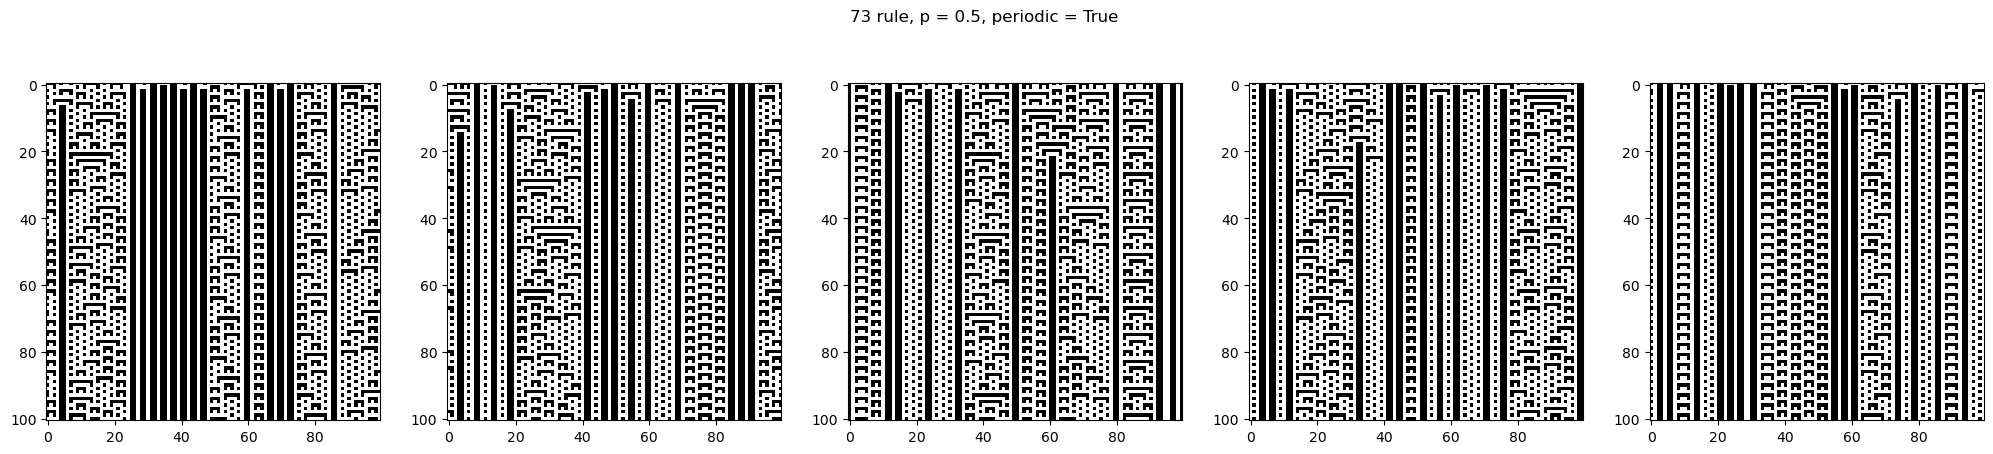

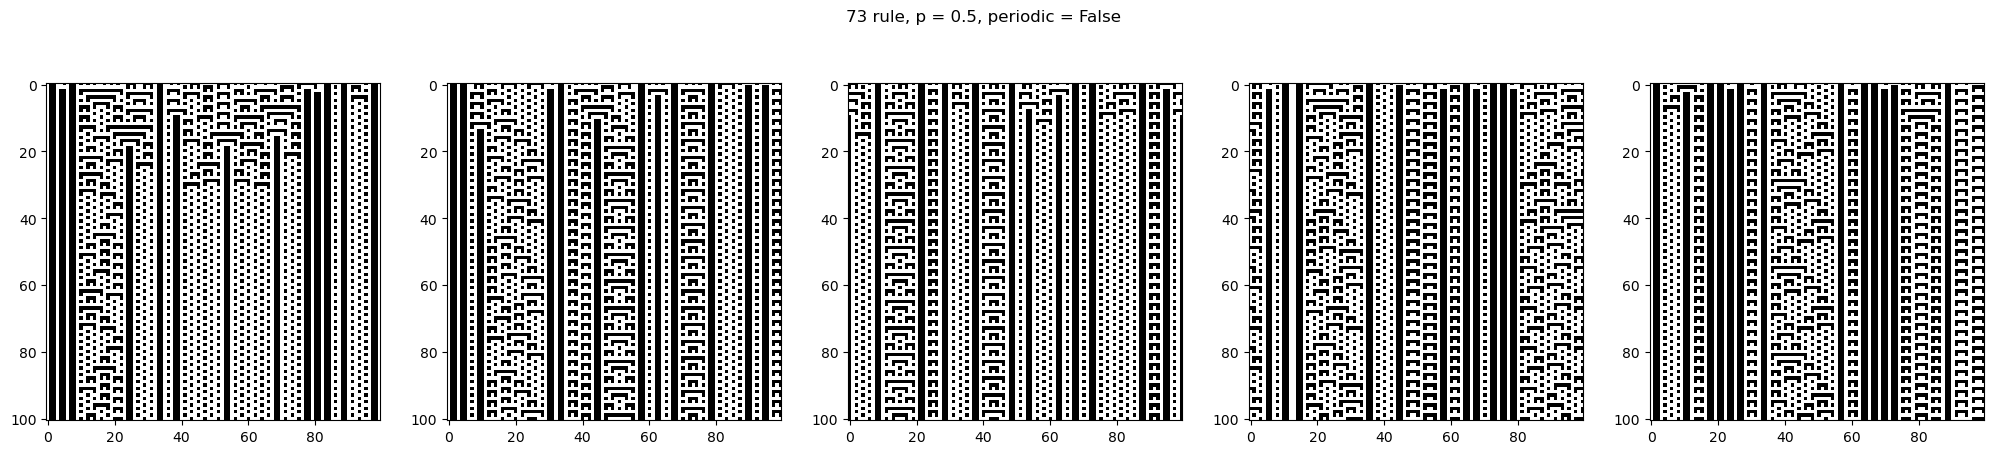

In [66]:
n_plots = 5
p = 0.5
rule = 73
for periodic in [True, False]:
    plt.figure(figsize=(n_plots*5, 5))
    plt.suptitle(f"{rule} rule, p = {p}, periodic = {periodic}")
    rules = number_to_rules(rule)
    for i in range(n_plots):
        plt.subplot(1, n_plots, i+1)
        field = generate_field(100, p=p)
        steps = simulate(rules, 100, field, periodic=True)
        grid = np.array(steps)
        plt.imshow(grid, cmap="Greys")


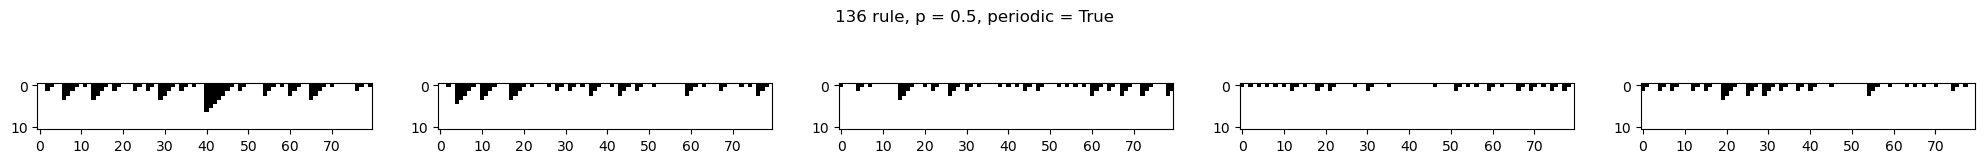

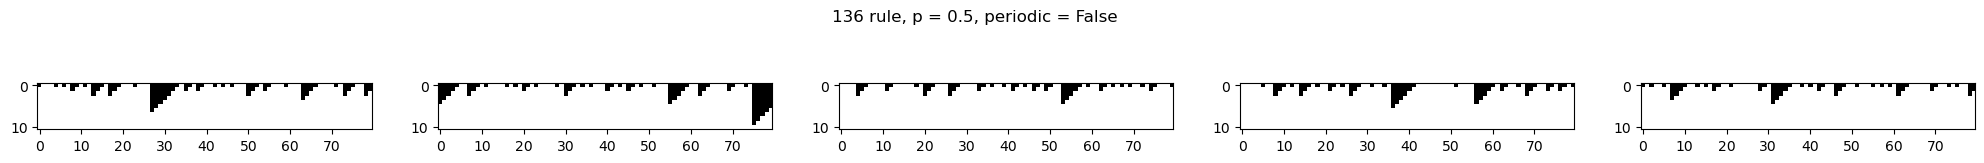

In [88]:
n_plots = 5
p = 0.5
rule = 136
for periodic in [True, False]:
    plt.figure(figsize=(n_plots*5, 2))
    plt.suptitle(f"{rule} rule, p = {p}, periodic = {periodic}")
    rules = number_to_rules(rule)
    for i in range(n_plots):
        plt.subplot(1, n_plots, i+1)
        field = generate_field(80, p=p)
        steps = simulate(rules, 10, field, periodic=True)
        grid = np.array(steps)
        plt.imshow(grid, cmap="Greys")


Overview

In [18]:
def visualize_rule(n):
    print(f"----------------- visualization of rule{n: 4} -----------------")
    rule = number_to_rules(n)
    for i in reversed(range(8)):
        print(" " + f"{i:b}".zfill(3), end="\t")
    print()
    for i in range(8):
        print(f"  {rule[i]}", end="\t")
    print()
    print()


visualize_rule(90)
visualize_rule(150)
visualize_rule(18)
visualize_rule(73)
visualize_rule(136)

----------------- visualization of rule  90 -----------------
 111	 110	 101	 100	 011	 010	 001	 000	
  0	  1	  0	  1	  1	  0	  1	  0	

----------------- visualization of rule 150 -----------------
 111	 110	 101	 100	 011	 010	 001	 000	
  1	  0	  0	  1	  0	  1	  1	  0	

----------------- visualization of rule  18 -----------------
 111	 110	 101	 100	 011	 010	 001	 000	
  0	  0	  0	  1	  0	  0	  1	  0	

----------------- visualization of rule  73 -----------------
 111	 110	 101	 100	 011	 010	 001	 000	
  0	  1	  0	  0	  1	  0	  0	  1	

----------------- visualization of rule 136 -----------------
 111	 110	 101	 100	 011	 010	 001	 000	
  1	  0	  0	  0	  1	  0	  0	  0	



Rule 90 is a rule to produce exactly sierpinski triangle. But with chaotic initial field it produces a bit messy images.

Rule 150 is as discussed just adding all ancestors modulo 2. Linear rule

Rule 18 makes pretty sparse pictures as any cells with neighbors die, but every lonely cell produces 2 cells, so the whole population doesn't die out, and picture doesn't strongly depend on initial conditions. 

Rule 73 allow 2 isolated cells to live long without movement, so one can see bold vertical lines on the plots. Bigger groups of cells die, but on the empty space instantly new cells are born, so no areas are empty for a long time, and between bold lines one can see different types of oscillations. 

Rule 136 is pretty "severe". In each connected group of cells the most right cell dies, so the overall population also dies out quickly. 



And as a rule all these rules doesn't really depend on the type of boundary conditions. 

## Traffic rules (184) (d)

In [92]:
visualize_rule(184)
rules = number_to_rules(184)

----------------- visualization of rule  184 -----------------
 111	 110	 101	 100	 011	 010	 001	 000	
  1	  0	  1	  1	  1	  0	  0	  0	



Traffic jam of 6 cars and different overall density of cars on the street.

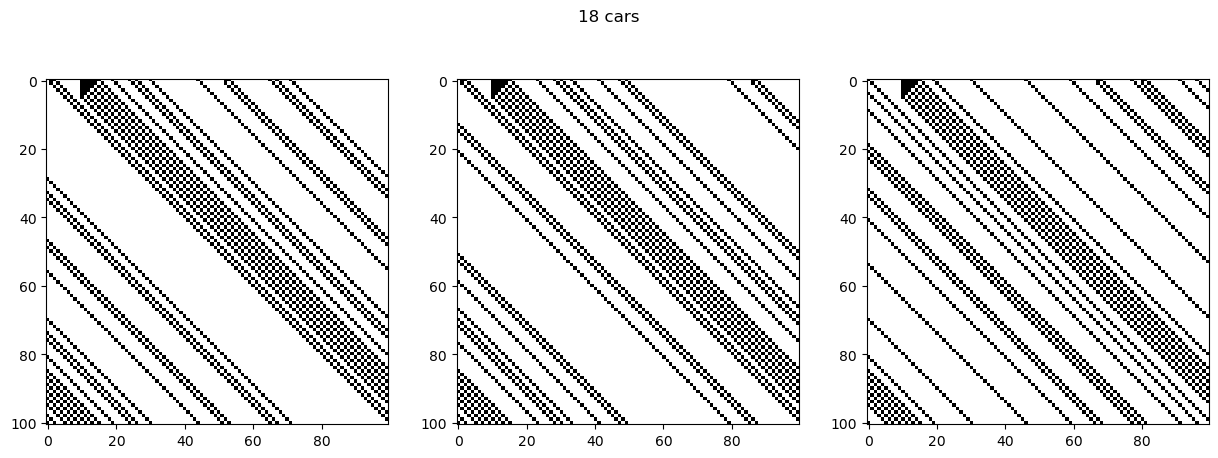

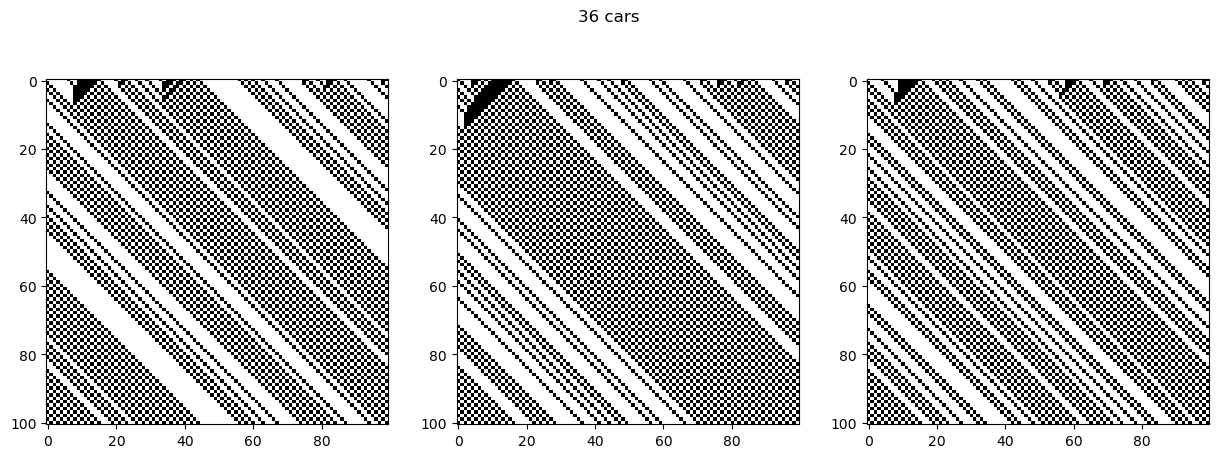

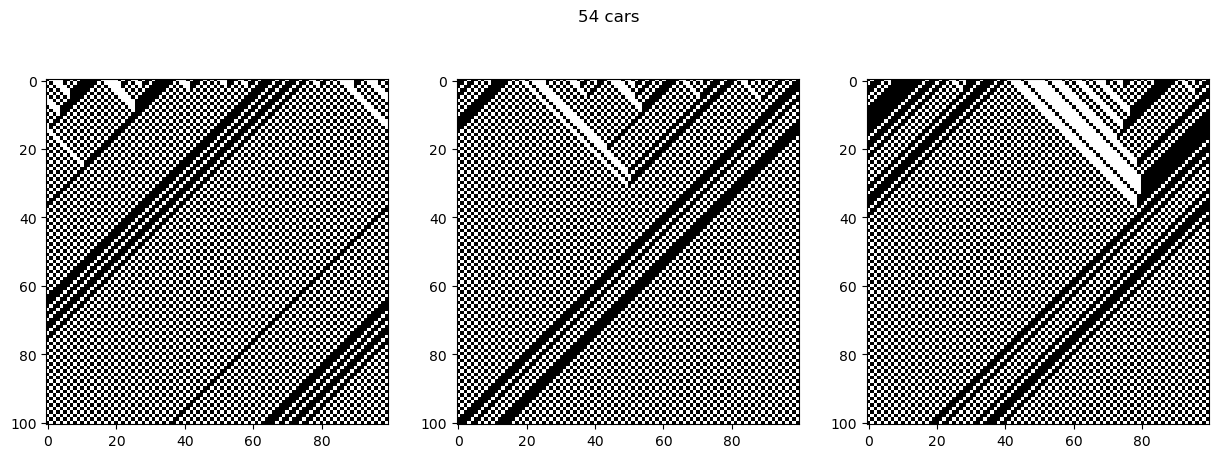

In [105]:
for n_cars in [18, 18*2, 18*3]:
    n_plots = 3
    plt.figure(figsize=(n_plots*5, 5))
    plt.suptitle(f"{n_cars} cars")
    for i in range(n_plots):
        plt.subplot(1, n_plots, i+1)
        field = np.zeros(100)
        for i in range(10, 10+6):
            field[i] = 1

        rest = np.random.choice(np.where(field==0)[0], n_cars-6, replace=False)
        field[rest] = 1

        steps = simulate(rules, 100, field, periodic=True)
        grid = np.array(steps)
        plt.imshow(grid, cmap="Greys")

## Conclusion:

In this model of traffic jams if there are less than 1 car per 2 pieces of the road, then the jam will eventually disappear and all cars will move with constant speed with interval of at least 1 tile.

If there are more than 1 car per 2 tiles, such movement with interval is not possible for all cars at the same time. So there constantly will be some jam. In these jam cars will be placed one by one and the most right cars will begin to move in the flow, while at the same time new cars will stop at the left size of the jam, keeping its length constant. That results in these pattern, that bold lines (traffic jams) move against the cars direction (from right to left).

## Traffic rule with higher velocities. Nagel-Schreckenberg model of traffic

In [110]:
def simulate_cars(n_steps, initial_field, speeds, max_speed=5):
    steps = [np.array(initial_field, dtype=bool)]

    for i in range(n_steps):
        prev = steps[-1]
        new_speeds = np.zeros_like(speeds)
        next = np.zeros_like(prev, dtype=bool)

        for i in range(len(prev)):
            if prev[i] == 0:   # no car
                continue
            try_speed = min(speeds[i]+1, max_speed)
            for j in range(i+1, i+1+try_speed):
                if prev[j%len(prev)]: # limiting car on the way
                    next[(j-1)%len(prev)] = 1
                    new_speeds[(j-1)%len(prev)] = j-1 - i
                    break
            else:
                assert prev[(i+try_speed)%len(prev)] == 0
                next[(i+try_speed)%len(prev)] = 1
                new_speeds[(i+try_speed)%len(prev)] = try_speed

        steps.append(next)
        speeds = new_speeds
    return steps

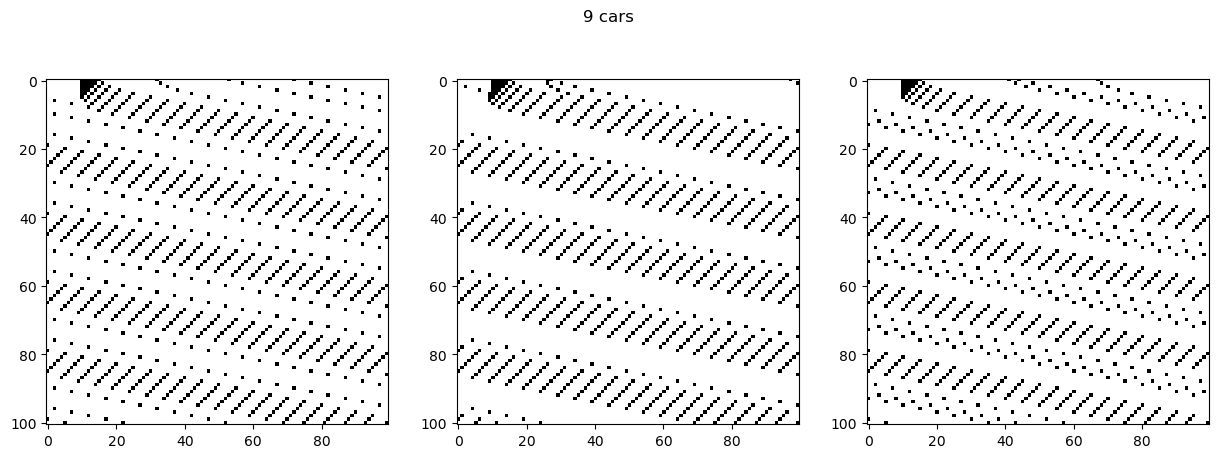

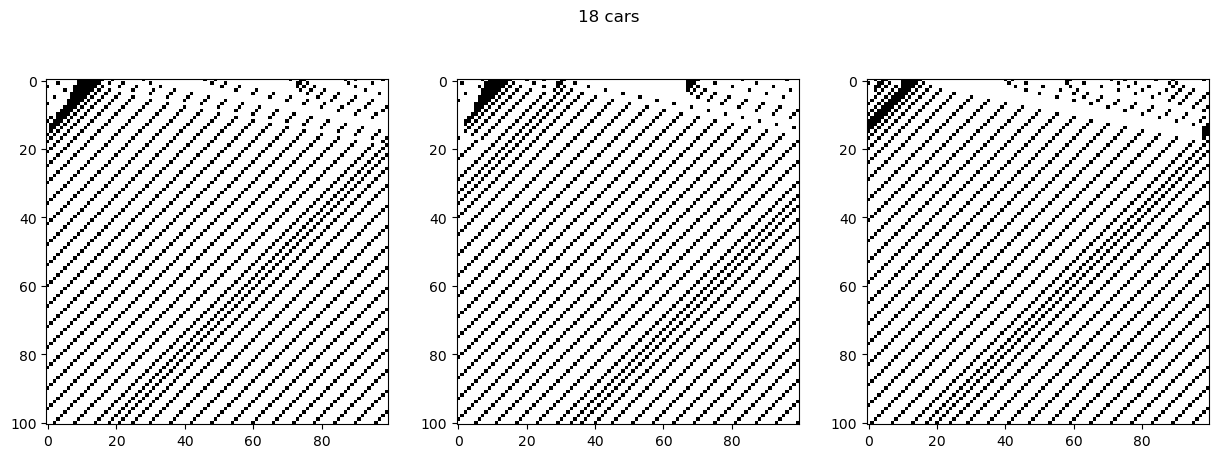

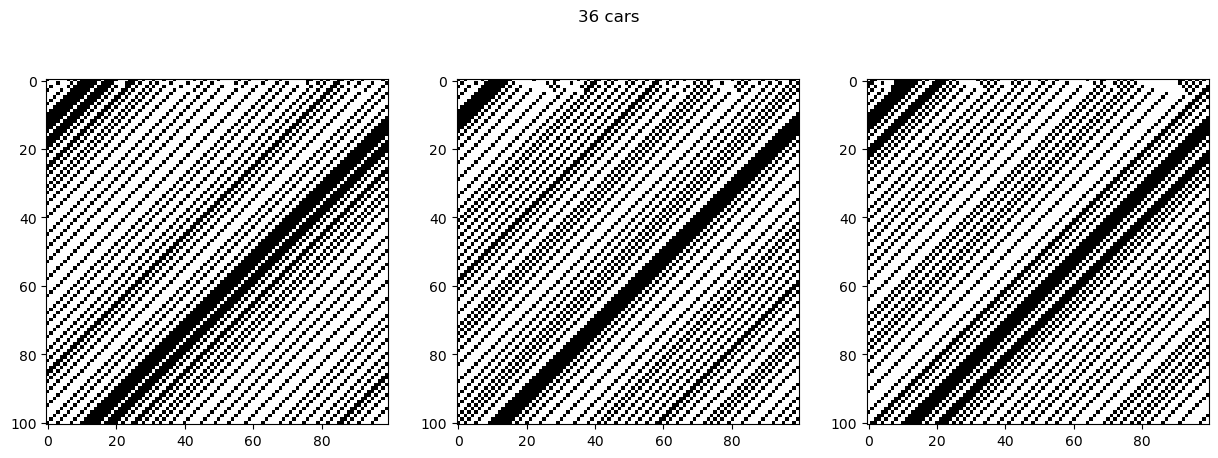

In [113]:
for n_cars in [9, 18, 36]:
    n_plots = 3
    plt.figure(figsize=(n_plots*5, 5))
    plt.suptitle(f"{n_cars} cars")
    for i in range(n_plots):
        plt.subplot(1, n_plots, i+1)
        field = np.zeros(100)
        speeds = np.random.randint(0, 5, 100)
        for i in range(10, 10+6):
            field[i] = 1
            speeds[i] = 0

        rest = np.random.choice(np.where(field==0)[0], n_cars-6, replace=False)
        field[rest] = 1

        steps = simulate_cars(100, field, speeds)
        grid = np.array(steps)
        plt.imshow(grid, cmap="Greys")

In these model we can see, how increasing of distances between cars results in increasing of average speed of cars and thus the flow.